In [13]:
import numpy as np
import torchvision
from PIL import Image
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import torch
import torch.nn as nn

import random
from IPython import display
import skimage.transform
import torch.utils.data

In [14]:
data_transforms = {
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    
}

In [15]:
test_dir = datasets.ImageFolder('/home/madiou/Documents/A-Baamtu/learning_step/img_classif/data_with_augmentation/test',
                                data_transforms['test'])

test_dataset = torch.utils.data.DataLoader(test_dir, batch_size=4)

In [4]:
test_dir

Dataset ImageFolder
    Number of datapoints: 540
    Root location: /home/madiou/Documents/A-Baamtu/learning_step/img_classif/data_with_augmentation/test

In [5]:
class_names_test = test_dir.classes
class_names_test

['passport', 'sn_1_recto', 'sn_1_verso', 'sn_2_recto', 'sn_2_verso']

In [6]:
model = models.resnet50(pretrained=True)

model.fc = nn.Linear(in_features=2048, out_features=5, bias=True)
model.fc

Linear(in_features=2048, out_features=5, bias=True)

In [7]:
model.load_state_dict(torch.load('/home/madiou/Documents/A-Baamtu/learning_step/img_classif/output/new_model_weights.pt')['model_state_dict'])

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [8]:
# for images, labels in test_dataset:
#     break

dataiter = next(iter(test_dataset))
images, labels = dataiter
images.size()

torch.Size([4, 3, 224, 224])

In [9]:
# accuracy = 0
# total_sample = 0
# for inputs, labels_test in test_dataset:
    
#     outputs = model(inputs)
# #     print(outputs)
#     _, pred = torch.max(outputs, 1)
#     total_sample += 4
    
#     print('{} target'.format(labels_test))
#     print('{} prediction'.format(pred))
#     accuracy += sum(pred == labels_test).tolist()
#     print(sum(pred==labels_test).tolist())
#     print('-----------------------------------')
# #     break
# # outputs
# print('the accuracy is {} % '.format(round((accuracy/total_sample)*100, 2)))

In [10]:
test_dir_0 = datasets.ImageFolder('/home/madiou/Documents/A-Baamtu/learning_step/img_classif/data_doc/for_test',
                                data_transforms['test'])

test_0 = torch.utils.data.DataLoader(test_dir_0, batch_size=4)

In [11]:
for inputs, labels_test in test_0:
    
    outputs = model(inputs)
#     print(outputs)
    _, pred = torch.max(outputs, 1)
    idx = pred.tolist()[0]
    print(class_names_test[idx])

sn_1_recto
sn_2_verso
passport


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Nous avons ['sn_1_recto', 'passport', 'sn_2_recto', 'sn_2_recto']


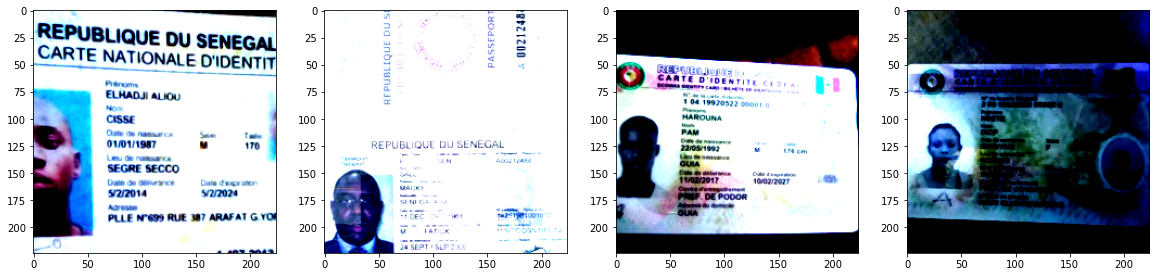

In [12]:
images, label = iter(test_0).next()

outputs = model(images)
_, pred = torch.max(outputs, 1)
idx_mul = pred.tolist()
    #     print(idx)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 7))
img = [images[i].permute(1, 2, 0) for i in range(4)]
ax1.imshow(img[0])
ax2.imshow(img[1])
ax3.imshow(img[2])
ax4.imshow(img[3])
print('Nous avons %s' % [class_names_test[idx] for idx in idx_mul])